## RL blood matching

<p> Start off using only the 3 major antigens: A,B and D. </p>

In [ ]:
import pandas as pd
import numpy as np
import glob
from scipy.ndimage import gaussian_filter1d
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [34]:
# Reads results csv files into df
def read_csv(path):
    csv_files = glob.glob(path + "/*.csv")
    df_list = (pd.read_csv(file) for file in csv_files)
    full_df = pd.concat(df_list, ignore_index=True)
    full_df.columns = [c.replace(' ', '_') for c in full_df.columns]
    return full_df

In [48]:
# Separates and plots rewards
r_nex = -60 # reward for non-existent action
def plot_reward(df, lr):
    # Multiple number of nonexistent issues by r_nex
    reward_nex = r_nex * df['issued_but_nonexistent']
    # Remaining reward is the reward for existent issues
    reward_rem = df['reward'] - reward_nex

    plt.plot(savgol_filter(reward_rem, window_length=200, polyorder=2), label='reward_rem')
    plt.plot(savgol_filter(reward_nex, window_length=200, polyorder=2), label='reward_nex')

    plt.legend(loc="lower right")

    plt.xlabel('Timesteps')
    plt.ylabel('Reward')
    plt.title("Alpha = " + str(lr))

    plt.show()

### Neural network architecture
#### Input size

```
input_size = len(np.ravel(self.env.state))

# state dimension = 8 x 44
# 8:    number of blood groups
# 44:   max age (35) + max lead time (9)

input size = 8 * 44 = 352
```
#### Output size
```
output_size = self.env.action_space.shape[0]
# equal to number of actions: 8
```
#### Model
```
input -> [8, relu] -> [64, tanh] -> [32, tanh] -> [output, sigmoid]
```

### 1 Learning rate tests

In [47]:
path_a01 = r'results/request_scratch/learning_rates/a0.01'
path_a001 = r'results/request_scratch/learning_rates/a0.001'
path_a0001 = r'results/request_scratch/learning_rates/a0.0001'

In [ ]:
a01 = read_csv(path_a01)
a001 = read_csv(path_a001)
a0001 = read_csv(path_a0001)

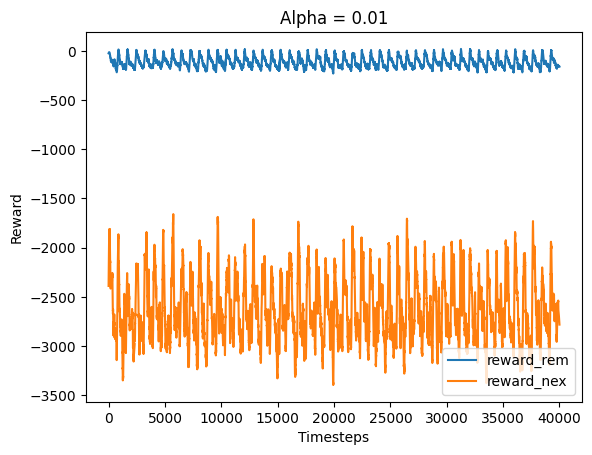

In [43]:
plot_reward(a01, 0.01)

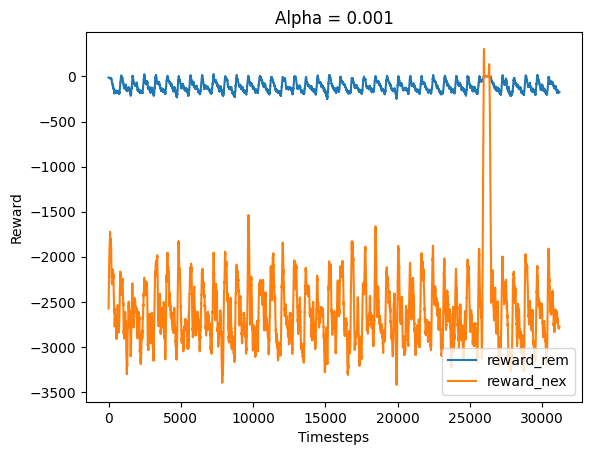

In [44]:
plot_reward(a001, 0.001)

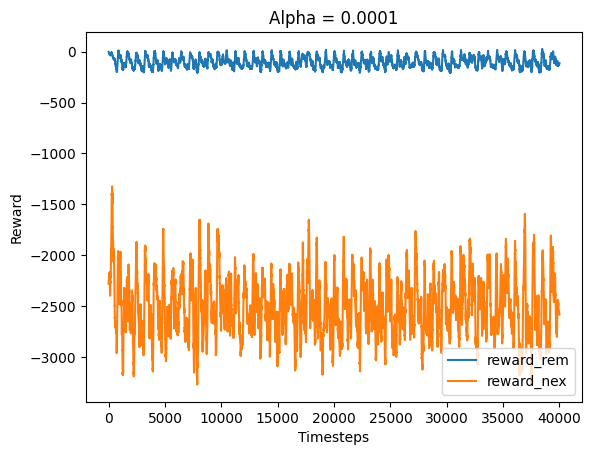

In [45]:
plot_reward(a0001, 0.0001)